# Customer Sentiment Analysis Based on Mobile App Reviews of Takealot, Shoprite Checkers Sixty60, and Woolworths South Africa.

South Africa's retail sector is the biggest in the African continent in terms of volume and value - boasting of legacy retail brands running succesful retails operations in South Africa and other countries where they have opened subsidiaries.

The key retailers with customer-centric mobile apps include:

- Takealot
- Shoprite Checkers
- Woolworths South Africa

Customers leave reviews of their experience using mobile apps for shopping for the aforementioned retailers on Google playstore - the main source  of data for our project.

Each retailer would love to improve the customer experience derived from using their mobile app for shopping.

**Business Logic**

Some key business questions/concerns that would help the retailers in refining their digital experience strategy include:
- What do you think drives the most significant user satisfaction for woolworths/shoprite/Takealot customers?

- How can we prioritize these core drivers  in our digital strategy, core product offerings and customer satisfaction/retention strategy?

- If user sentiment trends change over time, what could that reveal about the success of Woolworth/Shoprite/Takealot's strategies?

- Is there a difference on impact of specific updates or features on customer sentiment and retention?


**Project Scope**

The core elements of the project entail:
1. Data Scraping Plan

2. Exploratory Data Analysis:
  * Dataset profile
  * Data Pre-processing: Data cleansing actions
  * Answering Key Questions linked to the dataset

3. Sentiment Analysis: Conduct sentiment analysis using algorithims like:
    * Lexicon/rule based algorithims:VADER
    * Advanced pre-trained models: Huggie's NLP pre-trained models to to determine the sentiment (positive, negative, neutral) of each review

4. Keyword Analysis: Identify common themes and issues affecting each app's users. In technica context, implement Aspect-Based Sentiment Analysis (ABSA)

5. Temporal Sentiment Analysis:
   * Track trends over time to see how user feedback evolves after app updates or new feature launches. This will help assess the impact of changes on user satisfaction.

6. User segment analysis: Segment users based on review patterns, and common themes/topics

6. Summarized Insights

7. Recomendations


## Data Scraping Plan

The plan entails acquiring mobile app reviews for each retailer from Google Playstore, and analyze it.

The data collection method will involve using Google Play Scrapper library to collect mobile reviews data.

Steps of scrapping:

* Load libraries
* Display a snapshot of app details for Woolworths app, Shoprite Checkers Sixty60 and Takealot app
* Scrap reviews using a script
* Save reviews as CSV file for analysis


In [ ]:
# prompt: load os library

import os


In [ ]:
#installing library in environment
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.1 MB/s eta 0:00:00


In [ ]:
# loading libraries

from google_play_scraper import Sort, app,  reviews_all # scrapping reviews from Google Playstore
import pandas as pd  #storing collected data as csv/dataframe and analysis

In [ ]:
# Woolworths South Africa app detail

# ID for Woolworths app
app_id = "com.awfs.coordination"

# Fetch app details
woolworths_details = app(app_id)

# Convert details to a DataFrame
woolworths_details_df = pd.DataFrame([woolworths_details])

# Display the details
print(woolworths_details_df.T)  # Transpose to view results vertically




                                                                          0
title                                                            Woolworths
description               Get the Woolworths app and enjoy quality and d...
descriptionHTML           Get the Woolworths app and enjoy quality and d...
summary                   It’s everything you love about Woolies, now on...
installs                                                         1,000,000+
minInstalls                                                         1000000
realInstalls                                                        3205035
score                                                                  3.78
ratings                                                               83124
reviews                                                                  56
histogram                                  [20606, 1397, 3841, 4889, 51341]
price                                                                     0
free        

In [ ]:
# Takealot app detail

# ID for takealot app
app_id2 = "fi.android.takealot"

# Fetch app details
takealot_details = app(app_id2)

# Convert details to a DataFrame
takealot_details_df = pd.DataFrame([takealot_details])

# Display the details
print(takealot_details_df.T)  # Transpose to view results vertically




                                                                          0
title                                        Takealot – Online Shopping App
description               Shop online for electronics, everyday essentia...
descriptionHTML           Shop online for electronics, everyday essentia...
summary                   Shop the range! Save big on tech must-haves: T...
installs                                                        10,000,000+
minInstalls                                                        10000000
realInstalls                                                       14256815
score                                                              4.638656
ratings                                                              370135
reviews                                                                 515
histogram                                [12436, 2974, 9192, 55966, 289024]
price                                                                     0
free        

In [ ]:
# shoprite checkers60 app detail

# ID for checkers app
app_id3 = "za.co.shoprite.sixty60"

# Fetch app details
checkers_details = app(app_id3)

# Convert details to a DataFrame
checkers_details_df = pd.DataFrame([checkers_details])

# Display the details
print(checkers_details_df.T)  # Transpose to view results vertically




                                                                          0
title                                                      Checkers Sixty60
description               Checkers Sixty60 is South Africa’s #1 delivery...
descriptionHTML           Checkers Sixty60 is South Africa’s #1 delivery...
summary                   Get groceries delivered in 60 minutes with Che...
installs                                                         1,000,000+
minInstalls                                                         1000000
realInstalls                                                        4203067
score                                                                  3.18
ratings                                                               38379
reviews                                                                 101
histogram                                  [14166, 1030, 2833, 3348, 16484]
price                                                                     0
free        

In [ ]:
# Scrape reviews for the 3 apps

#step 1: Define functiion that will fetch all reviews for the 3 retailer apps

# Define app IDs
app_ids = {
    "Woolworths": "com.awfs.coordination",
    "Takealot": "fi.android.takealot",
    "Shoprite Sixty60": "za.co.shoprite.sixty60",
}



# Function to fetch all reviews for a given app ID from South Africa
def fetch_all_reviews(app_id, country="za"):
    """
    Fetches all reviews for a specified app from the Google Play Store.

    Args:
        app_id (str): The app ID from the Google Play Store.
        country (str): The country code for fetching localized reviews (default: "za" for South Africa).

    Returns:
        list: A list of dictionaries, where each dictionary represents a single review.
            Each dictionary contains:
            - 'reviewId': Unique ID for the review.
            - 'userName': Name of the user who posted the review.
            - 'content': Text content of the review.
            - 'score': Rating given by the user (1 to 5).
            - 'thumbsUpCount': Number of likes for the review.
            - 'at': The date the review was posted.
    """
    return reviews_all(
        app_id,
        lang="en",  # Language of reviews
        country=country,  # Country for reviews (South Africa)
        sort=Sort.MOST_RELEVANT, #  Sortmost relevant reviews
    )


In [ ]:
#Step 2:Fetch reviews for all apps

# File to save the reviews
output_file = "retail_apps_reviews_static.csv"

# control flow below prevents data from changing as new reviews are added to the Play Store for each retail app

# Check if the static file already exists
if os.path.exists(output_file):
    # Load the static DataFrame
    df = pd.read_csv(output_file)
    print("Loaded existing static reviews from file.")
else:
    all_reviews = []
    for app_name, app_id in app_ids.items():
        print(f"Fetching reviews for {app_name}...")
        reviews_data = fetch_all_reviews(app_id)
        for review in reviews_data:
            all_reviews.append({
                "App Name": app_name,
                "Review ID": review["reviewId"],
                "User Name": review["userName"],
                "Content": review["content"],
                "Score": review["score"],
                "Thumbs Up": review["thumbsUpCount"],
                "Date": review["at"],
                "App Version": review["appVersion"],
            })
    # Convert the reviews data to DataFrame
    reviews_df = pd.DataFrame(all_reviews)
    #save the dataframe into a csv file:
    reviews_df.to_csv(output_file, index=False) #Saving into output file
    print(f"Reviews data saved to {output_file}")

Fetching reviews for Woolworths...
Fetching reviews for Takealot...
Fetching reviews for Shoprite Sixty60...
Reviews data saved to retail_apps_reviews_static.csv


In [ ]:
# Convert the reviews to a DataFrame or read static csv file
reviews_df = pd.read_csv('retail_apps_reviews_static.csv')


# Display the first few rows of the DataFrame
print(reviews_df.head())

     App Name                             Review ID      User Name  \
0  Woolworths  e7b00bed-9b6a-4ee0-a8cd-41f1a2336de2  A Google user   
1  Woolworths  38adc4c3-e685-443c-95e6-853de434fbfa  A Google user   
2  Woolworths  b00e10ee-43b3-4bbe-af00-0ce7f674b506  A Google user   
3  Woolworths  db375f33-f293-45fb-9c80-4706fc9afb3e  A Google user   
4  Woolworths  b22a1d5d-b36b-4d16-a075-d02c779e6734  A Google user   

                                             Content  Score  Thumbs Up  \
0  This app is terrible, one of the worst. Every ...      1         37   
1  The app loads absolutely slow and navigating b...      1         37   
2  I have to give credit because the continuous i...      3         42   
3  Guys this app is convoluted and frustrating. J...      2         55   
4  Oops. Something went wrong... It seems that ch...      1          6   

                  Date App Version  
0  2024-11-21 12:51:28      9.24.0  
1  2024-09-28 10:29:45      9.22.1  
2  2024-08-21 11:04:01 

In [ ]:
# Number of reviews for each retail app
print(reviews_df['App Name'].value_counts())

App Name
Takealot            113251
Shoprite Sixty60     20963
Woolworths           12577
Name: count, dtype: int64


In [ ]:
# inspecting shape of data
reviews_df.shape

(146791, 8)

### Key Facts from Scraping Retail Apps' Mobile App Reviews

* Only relevant mobile app reviews were retrieved from Google Playstore
* Cunulatively, About 146K+ reviews were scraped from Google Playstore
* Segmenting number of reviews per retail app:

    1) **Takealot**: 113,252 reviews

    2) **Shoprite Sixty60**: 20,950 reviews

    3) **Woolworths**: 12,564 reviews


## Exploratory Data Analysis

Exploratory data analysis involves investigating and summarizing key insights and main characteristics linked to the data. The process provides answers to significant questions that arise when processing(cleaning) the data.

**Goals of Exploratory Data Analysis**

Key goals looking to be achieved by implementing EDA include:

1. Discovering the underlying structure of the dataset
2. Extract patterns, anomalies and trends in the dataset
3. Test hypotheses and validate assumptions about the data
4. Forecast what problems could be solved by insights extracted from the data

**Key EDA Steps**

* Data profile review: Source of data, inspecting the structure of the dataset with the aim of understanding the shape of our dataset, features(variables), data types, missing values and duplicated values
* Data Pre-processing: Depending on results of understanding the dataset, we can clean and wrangle our dataset
* Answering Exploratory Questions linked to the dataset

In [ ]:
# Loading  libraries for EDA

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#set style for my visualizations
plt.style.use('ggplot')

In [ ]:
# load interactive visualization package - plotly
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
# saving visuals
!pip install -U kaleido
import kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.8 MB/s eta 0:00:00


In [ ]:
# check number of reviews
print(f"The # of reviews submitted: {reviews_df.shape[0]}")

The # of reviews submitted: 146791


In [ ]:
# inspect first data points of the dataset
reviews_df.head()

App Name                             Review ID      User Name  \
0  Woolworths  e7b00bed-9b6a-4ee0-a8cd-41f1a2336de2  A Google user   
1  Woolworths  38adc4c3-e685-443c-95e6-853de434fbfa  A Google user   
2  Woolworths  b00e10ee-43b3-4bbe-af00-0ce7f674b506  A Google user   
3  Woolworths  db375f33-f293-45fb-9c80-4706fc9afb3e  A Google user   
4  Woolworths  b22a1d5d-b36b-4d16-a075-d02c779e6734  A Google user   

                                             Content  Score  Thumbs Up  \
0  This app is terrible, one of the worst. Every ...      1         37   
1  The app loads absolutely slow and navigating b...      1         37   
2  I have to give credit because the continuous i...      3         42   
3  Guys this app is convoluted and frustrating. J...      2         55   
4  Oops. Something went wrong... It seems that ch...      1          6   

                  Date App Version  
0  2024-11-21 12:51:28      9.24.0  
1  2024-09-28 10:29:45      9.22.1  
2  2024-08-21 11:04:01      9.20.2  
3  2024-09-05 10:08:06      9.21.0  
4  2025-01-17 07:35:47      9.24.2

In [ ]:
# Dataset information

reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146791 entries, 0 to 146790
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   App Name     146791 non-null  object
 1   Review ID    146791 non-null  object
 2   User Name    146791 non-null  object
 3   Content      146766 non-null  object
 4   Score        146791 non-null  int64 
 5   Thumbs Up    146791 non-null  int64 
 6   Date         146791 non-null  object
 7   App Version  132749 non-null  object
dtypes: int64(2), object(6)
memory usage: 9.0+ MB


**Data Features Meaning**

Columns present in the dataset include:

1. **Review ID**: Unique identifier for each review
2. **App Name**: Name of the retailer
3. **user Name**: Name of the user who posted the review
4. **Content**: Text content of the review
5. **Score**: Star rating given by the user (1-5)
6. **Thumbs Up**: Number of thumbs-up (likes) the review received
7. **Date**: Date and time when the review was posted
8. **App Version**: Version of the app when the review was posted






In [ ]:
# inspect a sample of the acual reviews and score per retailer

reviews_df[['App Name','Content','Date', 'Score']].sample(20)

App Name                                            Content  \
86795           Takealot                                                ❤❤❤   
94523           Takealot                                          Amazing 👏   
114126          Takealot                                              Great   
139780  Shoprite Sixty60       Bugged update keeps kicking me out mid order   
74417           Takealot                                      Best app ever   
91733           Takealot                                           Good app   
103308          Takealot                                        Exceptional   
138804  Shoprite Sixty60  Not worth it as you do not get,product priceli...   
45735           Takealot                       Quick, easy and convenient 😊   
139837  Shoprite Sixty60                                   Awesome and fast   
75971           Takealot                                    I like this aap   
83504           Takealot                                          Great app   
104582          Takealot                                Exceptional service   
60018           Takealot                                Always good service   
112073          Takealot                                  Excellent service   
39955           Takealot                       Fast, reliable and efficient   
58536           Takealot  Takealot have an exception service ..keep it u...   
129632  Shoprite Sixty60  So I cannot sign up, because my xtra savings c...   
22083           Takealot  The app is easy to navigate and ordering and p...   
16220           Takealot                    Great service and best products   

                       Date  Score  
86795   2023-08-03 08:58:10      5  
94523   2022-06-15 07:35:18      5  
114126  2019-12-03 07:53:04      5  
139780  2024-10-30 06:51:47      2  
74417   2020-08-14 08:10:31      5  
91733   2022-09-10 14:53:05      5  
103308  2021-06-25 08:49:21      5  
138804  2023-03-30 09:17:16      1  
45735   2023-04-11 09:43:20      5  
139837  2024-11-08 09:13:39      5  
75971   2022-07-20 14:56:32      5  
83504   2023-12-26 10:17:17      5  
104582  2021-09-07 11:33:14      5  
60018   2024-07-31 08:18:25      5  
112073  2020-03-11 10:12:11      5  
39955   2020-02-18 16:19:17      5  
58536   2024-04-24 16:38:54      5  
129632  2023-12-16 13:58:30      1  
22083   2020-10-20 10:00:12      5  
16220   2024-12-30 21:21:56      5

In [ ]:
# check for missing values

reviews_df.isnull().sum()

App Name           0
Review ID          0
User Name          0
Content           25
Score              0
Thumbs Up          0
Date               0
App Version    14042
dtype: int64

In [ ]:
# Proportion of missing values in relation to total number of datapoints

missing_values_proportion = reviews_df.isnull().sum() / reviews_df.shape[0] * 100

print("Proportion of missing values in each column:")
print(missing_values_proportion)


Proportion of missing values in each column:
App Name       0.000000
Review ID      0.000000
User Name      0.000000
Content        0.017031
Score          0.000000
Thumbs Up      0.000000
Date           0.000000
App Version    9.565982
dtype: float64


One column that has significant missing values. The proportion of missing values  is low. The column is:
* `App Version`: 9.6%

The other columns with low number of missing values is:

* `Content`: 0.02%

**Next step**:
- Drop the rows with missing values in `Content` column
- Impute `App Version` column with mode value


In [ ]:
# Check for duplicates

duplicate_rows = reviews_df[reviews_df.duplicated()]

print(f"There are {duplicate_rows.shape[0]} duplicate rows in the reviews dataset.")


There are 0 duplicate rows in the reviews dataset.


In [ ]:
# Summary stats for numerical features
reviews_df[['Score', 'Thumbs Up']].describe().T

count      mean       std  min  25%  50%  75%    max
Score      146791.0  4.291319  1.320001  1.0  4.0  5.0  5.0    5.0
Thumbs Up  146791.0  0.689702  8.865246  0.0  0.0  0.0  0.0  822.0

### Data Pre-processing

This phase entails:
* Removing non-significant columns
* Renaming columns: `at`, `replyContent`, `repliedAt`, and `reviewCreatedVersion`
* Dealing with missing values


In [ ]:
# Make a copy of the original dataset

apps_df = reviews_df.copy()

In [ ]:
# Remove the following columns from the dataset: userImage, thumbsUpCount, reviewid, userName
apps_df.drop(['Review ID','Thumbs Up', 'User Name'], axis=1, inplace=True)


In [ ]:
# Check for remaining useful columns
apps_df.columns

Index(['App Name', 'Content', 'Score', 'Date', 'App Version'], dtype='object')

In [ ]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146791 entries, 0 to 146790
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   App Name     146791 non-null  object
 1   Content      146766 non-null  object
 2   Score        146791 non-null  int64 
 3   Date         146791 non-null  object
 4   App Version  132749 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.6+ MB


**Dealing with Missing Values**

Based on the output of missing values, here's how the columns containing missing values will be handled:

Drop the rows with missing values in `Content` column
- Impute `App Version` column filled with most frequent app version

In [ ]:
# fill missing values in 'appVersion' and 'reviewapp_version' with most frequent
# value

apps_df['App Version'].fillna(apps_df['App Version'].mode()[0], inplace=True)


<ipython-input-27-c69848bada30>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  apps_df['App Version'].fillna(apps_df['App Version'].mode()[0], inplace=True)


In [ ]:
# Drop missing values in Content column
apps_df = apps_df.dropna(subset=['Content'])

In [ ]:
# Ascertain if there is missing values
apps_df.isnull().sum()

App Name       0
Content        0
Score          0
Date           0
App Version    0
dtype: int64

In [ ]:
# Check cleaned dataset version
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146766 entries, 0 to 146790
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   App Name     146766 non-null  object
 1   Content      146766 non-null  object
 2   Score        146766 non-null  int64 
 3   Date         146766 non-null  object
 4   App Version  146766 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.7+ MB


In [ ]:
# Save the cleaned dataset into a csv file

apps_df.to_csv('cleaned_apps_df.csv', index=False)


### **Exploratory Questions**

Preliminary questions that can be used to investigate the general outlook of the dataset include:


1.   What's the overall distribution of review scores/ratings?
2.   Number of reviews per App version?
3.   Segment review score per App version




In [ ]:
# Quiz 1: distribution of review scores

apps_df[['App Name','Score']].value_counts().sort_index(ascending=True)

App Name          Score
Shoprite Sixty60  1         8684
                  2         1956
                  3         1745
                  4         1543
                  5         7033
Takealot          1         3091
                  2          920
                  3         2807
                  4        15262
                  5        91155
Woolworths        1         4209
                  2          966
                  3          747
                  4         1154
                  5         5494
Name: count, dtype: int64

In [ ]:
# visualization of distribution of review scores
fig = px.histogram(apps_df, x='Score', color='App Name', title='5-Score Reviews Dwarf others by Leading with 100K+ Reviews')
fig.write_image("App_Scores_plot.png")  # Save as PNG
fig.show()


In [ ]:
# for each review score per app, find retail app with highest number of reviews

# Group by app name and score, then count the number of reviews
reviews_by_app_score = apps_df.groupby(['App Name', 'Score']).size().reset_index(name='Review Count')

# Find the app with the highest number of reviews for each score
max_reviews_per_score = reviews_by_app_score.loc[reviews_by_app_score.groupby('Score')['Review Count'].idxmax()]

print(max_reviews_per_score)
print("-----------------------------------------------------")
max_reviews_per_score.groupby('App Name')['Review Count'].sum()

           App Name  Score  Review Count
0  Shoprite Sixty60      1          8684
1  Shoprite Sixty60      2          1956
7          Takealot      3          2807
8          Takealot      4         15262
9          Takealot      5         91155
-----------------------------------------------------


App Name
Shoprite Sixty60     10640
Takealot            109224
Name: Review Count, dtype: int64

#### Distribution of Reviews Score

Based on output of the visualization above and table:

- Majority of review scores were 5-score rating, containing **103,718 reviews with 5-star score**.
- Takelot app leads with the highest number of reviews that received 5-star score, **about 91,177 reviews**.
- Woolworths lags behind in all the review score range ( 1- 5) in terms of volume of reviews submitted by users

In [ ]:
# Quiz 2: Number of reviews per App version
reviews_app = apps_df[['App Name','App Version']].value_counts().reset_index(name='count').sort_index(ascending=True)
reviews_app

App Name App Version  count
0            Takealot       3.5.0  13410
1            Takealot       2.1.0   4016
2            Takealot      1.29.0   3836
3            Takealot       2.9.0   3768
4            Takealot       3.4.0   3687
..                ...         ...    ...
344          Takealot      3.35.0      1
345          Takealot       1.3.1      1
346          Takealot       1.3.0      1
347          Takealot       2.6.1      1
348  Shoprite Sixty60      1.4.38      1

[349 rows x 3 columns]

In [ ]:
# Visualize # of reviews per app version

# Create a faceted bar chart with one subplot per app
fig = px.bar(
    reviews_app,
    x="App Version",
    y="count",
    color="App Name",
    facet_col="App Name",  # Create one column for each app
    title="Number of Reviews per App Version by App",
    labels={"App Version": "App Version", "count": "Number of Reviews"},
)

fig.update_yaxes(matches=None)  # Independent y-scales
fig.update_layout(
    width=1200,  # Adjust width for side-by-side plots
    showlegend=True,
    legend_title="App Name",
)

fig.write_image("reviews_per_app_version_facet_col_free_y.png")
fig.show()



#### Number of Reviews per App Version Outcome

**Takealot:**

The number of reviews is highest for earlier app
versions, with a peak **around version 3.5.0**. Thereafter, the number of reviews gradually decreases as the app versions increase. This might indicate that the earlier versions had more user engagement or issues that prompted reviews.


**Shoprite Sixty60:**

The number of reviews peaks around **version 1.4.3** and then decreases sharply for subsequent versions. This suggests that version 1.4.3 had the highest user engagement, which may be due to a significant update or issues that attracted user attention.


**Woolworths:**

The number of reviews is highest around version 6.0.0 and then decreases for later versions. This could imply that version 6.0.0 was particularly significant in terms of user interaction or had notable changes that users responded to.




In [ ]:
# Quiz 3: Segmenting average review score by app version

review_score_app = apps_df.groupby(['App Name','App Version'])['Score'].mean().sort_values().reset_index()
review_score_app


App Name App Version  Score
0            Takealot       1.3.1    1.0
1            Takealot       1.2.1    1.0
2    Shoprite Sixty60      1.4.38    1.0
3            Takealot       1.3.2    1.0
4            Takealot     1.4.2.1    1.0
..                ...         ...    ...
344          Takealot       2.6.1    5.0
345          Takealot       1.4.1    5.0
346          Takealot      3.35.0    5.0
347        Woolworths       9.4.0    5.0
348          Takealot      1.13.0    5.0

[349 rows x 3 columns]

In [ ]:
# plot reviews score by app version

# A faceted bar chart with one subplot per app for reviews score by app version
fig = px.bar(
    review_score_app,
    x="App Version",
    y="Score",
    color="App Name",
    facet_col="App Name",  # Create one column for each app
    title="Average Review Score per App Version by App",
    labels={"App Version": "App Version", "Score": "Reviews Score"},
)

fig.update_yaxes(matches=None)  # Independent y-scales
fig.update_layout(
    width=1200,
    showlegend=True,
    legend_title="App Name",
)

fig.write_image("Review_Score_app_version.png")
fig.show()




In [ ]:
# for each app version per app, find app version with highest average review score


# Assuming 'reviews_df' is your DataFrame from the previous code

def highest_avg_review_per_app_version(df):
    """
    Finds the app version with the highest average review score for each app.

    Args:
        df: The DataFrame containing review data.

    Returns:
        A DataFrame with the app, app version, and highest average review score.
    """

    # Group by app and app version, calculate the average score
    avg_scores = df.groupby(['App Name', 'App Version'])['Score'].mean().reset_index()

    # Find the highest average score for each app
    highest_avg = avg_scores.loc[avg_scores.groupby('App Name')['Score'].idxmax()]

    return highest_avg

# Application of function on reviews_df
highest_review_versions = highest_avg_review_per_app_version(apps_df)
highest_review_versions

App Name App Version     Score
31   Shoprite Sixty60      1.4.13  4.450704
85           Takealot      1.13.0  5.000000
335        Woolworths       9.4.0  5.000000

#### Review Score per App Version Outcomes
Based on the ouput of review score per app version:

1. **Takealot:**

- App versions 3.35.0, 1.13.0, 2.61, and 2.62  received the highest average review scores of 5.0
- Review scores are consistently high, predominantly between 4 and 5, across app versions
- The smooth upward trend suggests that newer app versions maintain or improve user satisfaction

2. **Shoprite Sixty60:**

- App version 1.4.13 received the highest average review score of 4.45
- Review scores are significantly lower, clustered around 1 to 3, indicating a less positive user experience
- The upward trend in newer app versions may show some improvement, but overall, sentiment remains low compared to Takealot

3. **Woolworths:**

- App version 9.4.0 received the highest average review score of 5
- Review scores are concetrated around the middle, ranging mostly between 2.5 and 4
- While not as positive as Takealot, the upward trend across app versions shows steady improvements in user satisfaction

## Sentiment Analysis

The goal entails determining the sentiment behind each review - positive, negative or neutral.

**Approach**

Sentiment analysis can be performed using diffrenet algorithims. For this section, we will use the following algorithims to compare performance:

 * NLTK's VADER
 * Huggie's NLP pre-trained models


NLTK Vader is a rule-based sentimental analysis algorithims.



### VADER

The rule-based model uses a list of lexical features (e.g. word) which are labeled as positive or negative according to their semantic orientation to calculate the text sentiment.


The output of VADER is a dictionary with the following keys:

* **neg**: Negative sentiment score
* **neu**: Neutral sentiment score
* **pos**: Positive sentiment score
* **compound**: Overall sentiment score (normalized between -1 and 1)

In [ ]:
# install the library
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
# import library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
# instantiate sentiment object
sia = SentimentIntensityAnalyzer()

In [ ]:
# Test 1: get polarity score of this txt
txt = 'I love shopping at Shoprite'
txt_score = sia.polarity_scores(txt)
print(txt_score)

{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}


Sentiment score is dominantly positive.

In [ ]:
# Test 2: second string of text
txt2 = 'I do not like Rock music. It is too loud!'
txt2_score = sia.polarity_scores(txt2)
print(txt2_score)

{'neg': 0.211, 'neu': 0.789, 'pos': 0.0, 'compound': -0.3404}


Overall sentiment is negative, based on negative score and compoud score

In [ ]:
# Create a sentiment analysis function to retrieve sentiment scores based on VADER Model

def get_vader_sentiment(text):
    """
    Sentiment analysis function that computes the sentiment score using VADER.

    This function takes a text input, processes it using the VADER (Valence Aware Dictionary
    and sEntiment Reasoner) sentiment analysis tool, and returns the compound sentiment score.
    The compound score is a float within the range [-1.0, 1.0], where -1.0 indicates a very
    negative sentiment, 0 indicates a neutral sentiment, and 1.0 indicates a very positive sentiment.

    Parameters:
    text (str): The text data for which the sentiment score needs to be computed

    Returns:
    float: The compound sentiment score of the input text

    Example:
    >>> get_vader_sentiment("I love woolworths app! It's awesome to use.")
    0.6696
    >>> get_vader_sentiment("This app is terrible and very slow.")
    -0.7269
    """
    sentiment_dict = sia.polarity_scores(text)
    return sentiment_dict['compound']


In [ ]:
# inspect dataset
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146766 entries, 0 to 146790
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   App Name     146766 non-null  object
 1   Content      146766 non-null  object
 2   Score        146766 non-null  int64 
 3   Date         146766 non-null  object
 4   App Version  146766 non-null  object
dtypes: int64(1), object(4)
memory usage: 6.7+ MB


In [ ]:
# Appy get_vader_sentiment function on reviews_df
apps_df['vader_sentiment_score'] = apps_df['Content'].apply(get_vader_sentiment)
apps_df[['App Name', 'Content', 'Score', 'vader_sentiment_score']].head(10)


App Name                                            Content  Score  \
0  Woolworths  This app is terrible, one of the worst. Every ...      1   
1  Woolworths  The app loads absolutely slow and navigating b...      1   
2  Woolworths  I have to give credit because the continuous i...      3   
3  Woolworths  Guys this app is convoluted and frustrating. J...      2   
4  Woolworths  Oops. Something went wrong... It seems that ch...      1   
5  Woolworths  55 minutes to place an order. Unistalled app 7...      1   
6  Woolworths  This app is terrible. The cart disappears when...      1   
7  Woolworths  Terrible experience. Items were automatically ...      1   
8  Woolworths  FINALLY I can see exactly how much I've used o...      5   
9  Woolworths  I thought the Checkers app was bad, but this t...      1   

   vader_sentiment_score  
0                -0.1567  
1                -0.7650  
2                 0.9517  
3                -0.8658  
4                -0.8357  
5                 0.4871  
6                -0.8998  
7                 0.4767  
8                -0.4729  
9                -0.8966

In [ ]:
# Compute average vader sentiment score per App name
average_vader_sentiment = apps_df.groupby('App Name')['vader_sentiment_score'].mean()
print(average_vader_sentiment)


App Name
Shoprite Sixty60    0.128406
Takealot            0.511469
Woolworths          0.186770
Name: vader_sentiment_score, dtype: float64


In [ ]:
# Visualize distribution of vader sentiment score

# Create a histogram with subplots for each app
fig_hist = px.histogram(
    apps_df,
    x="vader_sentiment_score",
    nbins=20,
    color="App Name",
    facet_row="App Name",  # Create one row per app
    title="VADER Model Sentiment Scores Distribution by App",
    labels={"vader_sentiment_score": "Sentiment Score"},
    facet_row_spacing=0.03,  # Adjust spacing between facets
)

# Allow independent y-axis scales
fig_hist.update_yaxes(matches=None)

# Customize the layout
fig_hist.update_layout(
    height=900,  # Adjust height for better visualization
    showlegend=True,
    legend_title="App Name",
)
fig.write_image("VADER sentiment score per app.png") #save image
# Show the plot
fig_hist.show()

#### VADER Sentiment Analysis Model Outcomes

**Interpretation of Average Vader sentiment score:**

* Takealot had the highest average sentiment score: 0.51. This correlates to a **Strongly positive sentiment**, with customers generally expressing satisfaction and favorable experiences.

* It's followed by Woolworths, whose average sentiment score is low: 0.19. This translates to a **Slightly positive sentiment**, indicating a mix of neutral and positive reviews but leaning toward the positive side.

* The last one is Shoprite Sixty60, lagging behind with average vader sentiment score of 0.13. This translates to a **neutral-to-slightly-negative sentiment**, with more customer feedback reflecting indifference or dissatisfaction.

In summary:

* All retail apps got moderately positive vader sentiment score.
* **Takealot** leads in customer sentiment, likely setting a benchmark for the others.

* **Woolworths** and **Shoprite Sixty60** display room for significant improvement, with Shoprite Sixty60 lagging farthest behind in customer sentiment. These insights could inform prioritization for customer experience enhancements and feature improvements in these retail apps.


**Sentiment Score Distribution Insights**:

**Woolworths:**

The sentiment scores for Woolworths are mostly concentrated **around 0 and 0.5** (about 2,232 revivews), with significant peaks at these points. This indicates that most users have a neutral to slightly positive sentiment towards the Woolworths app. There are fewer negative sentiment scores, suggesting that negative feedback is less common.

**Takealot:**

The sentiment scores for Takealot show a strong peak **around 0.5** (about 34,11 reviews), indicating a high number of positive sentiments.There are fewer negative sentiment scores, which means that negative feedback is not as prominent

**Shoprite Sixty60:**

The sentiment scores for Shoprite Sixty60 are distributed with peaks **around 0 and 0.5**, similar to Woolworths. This shows that most users have a neutral to slightly positive sentiment towards the Shoprite Sixty60 app. Like the other apps, there are fewer negative sentiment scores.

### Limitations of Rule-based Sentiment Analysis Models

Ther are a few limitations of using the two rule-based sentiment analysis models. They include:

1. Limited context undestanding: The models can't infer relationship between words, sarcasm, irony or hidden meaning in the words
2. TextBlob does not effectively handle negation: For example,a sring of words like, "not well, or can do better", could be interpreted as positive sentiment
3. Limited lexicon: TextBlob has been trained on specific pre-defined group pf words which may not cover all words or phrases, especially slang or domain-specific terms


Available solutions entail using tarsnformer-based deep learning models that can detect context and have been trained on a large volume of data.



## Hugging Faces Models

We will use 1 pre-trained transformer models:

1. **distilbert-base-uncased-finetuned-sst-2-english**: A distilled version of BERT, fine-tuned on the Stanford Sentiment Treebank (SST-2) dataset.

Core benefits if the model: Lightweight and fast, making it suitable for large-scale sentiment analysis tasks.

 More information about the model can be found [here](https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).


### distilbert-base-uncased-finetuned-sst-2-english Model

The first transformer model to be applied on Showmax app reviews

In [ ]:
#load transformers library

from transformers import pipeline

In [ ]:
# pre-trained model: distilbert-base-uncased-finetuned-sst-2-english

# Instantiate the sentiment analysis pipeline

sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
result = sentiment_pipeline("Spotify is the best audio-streaming app. It's UI/UX is Great!.")
print(result)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9998183846473694}]


The output of the model using the string of text gives us a positive sentiment score of 0.99

In [ ]:
# Create sentiment analysis function based distilbert-base-uncased-finetuned-sst-2-english Model to be applied on dataset

def get_sentiment_distilbert(text):
    """
    Sentiment analysis function that computes the sentiment label and score using a pre-trained model from Huggies Face model.

    This function takes a text input, processes it using a sentiment analysis pipeline initialized with
    the 'distilbert-base-uncased-finetuned-sst-2-english' model from Hugging Face, and returns the sentiment
    label and score. The sentiment label indicates whether the sentiment is positive, negative, or neutral,
    and the sentiment score is a float representing the confidence of the sentiment label.

    Parameters:
    text (str): The text data for which the sentiment label and score need to be computed.

    Returns:
    tuple: A tuple containing the sentiment label (str) and the sentiment score (float).

    Example:
    >>> get_sentiment_distilbert("I love this app! It's the best app.")
    ('POSITIVE', 0.9998)
    >>> get_sentiment_distilbert("This app is terrible and not user-friendly.")
    ('NEGATIVE', 0.9987)
    """
    result = sentiment_pipeline(text)[0]
    return result['label'], result['score']


In [ ]:
# Apply get_sentiment_distilbet on apps_df

apps_df[['distilbert_sentiment_label', 'distilbert_sentiment_score']] = apps_df['Content'].apply(lambda x: pd.Series(get_sentiment_distilbert(x)))

# Display the first few rows to verify the changes
print(apps_df[['App Name','Content', 'Score', 'distilbert_sentiment_label', 'distilbert_sentiment_score']].head(5))


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


     App Name                                            Content  Score  \
0  Woolworths  This app is terrible, one of the worst. Every ...      1   
1  Woolworths  The app loads absolutely slow and navigating b...      1   
2  Woolworths  I have to give credit because the continuous i...      3   
3  Woolworths  Guys this app is convoluted and frustrating. J...      2   
4  Woolworths  Oops. Something went wrong... It seems that ch...      1   

  distilbert_sentiment_label  distilbert_sentiment_score  
0                   NEGATIVE                    0.999753  
1                   NEGATIVE                    0.999701  
2                   NEGATIVE                    0.969716  
3                   NEGATIVE                    0.999704  
4                   NEGATIVE                    0.979028  


In [ ]:
# sample the results
apps_df[['Content', 'Score', 'distilbert_sentiment_label', 'distilbert_sentiment_score']].sample(10)

Content  Score  \
21177   The App is easy to navigate, I love that my it...      5   
76162                                   Best of the best👌      5   
62862                    Top class app..never dissapoints      5   
107275                                              Great      5   
88173                                                Good      5   
108600                                          Great app      5   
104607                                           Loveable      5   
136671            Absolutely awesome service! THANK YOU 😊      5   
114311                                              Great      5   
91541                                        Good service      4   

       distilbert_sentiment_label  distilbert_sentiment_score  
21177                    POSITIVE                    0.998711  
76162                    POSITIVE                    0.999618  
62862                    POSITIVE                    0.998548  
107275                   POSITIVE                    0.999863  
88173                    POSITIVE                    0.999816  
108600                   POSITIVE                    0.999821  
104607                   POSITIVE                    0.999863  
136671                   POSITIVE                    0.999881  
114311                   POSITIVE                    0.999863  
91541                    POSITIVE                    0.999850

In [ ]:
# Compute average distilbert_sentiment score per app name

average_distilbert_sentiment = apps_df.groupby('App Name')['distilbert_sentiment_score'].mean()
print(average_distilbert_sentiment)


App Name
Shoprite Sixty60    0.987854
Takealot            0.986187
Woolworths          0.988382
Name: distilbert_sentiment_score, dtype: float64


In [ ]:
# Visualize distribution of distilbert sentiment score

# A histogram with subplots for each app
fig_hist = px.histogram(
    apps_df,
    x="distilbert_sentiment_score",
    nbins=20,
    color="App Name",
    facet_row="App Name",  # Create one row per app
    title="Distilbert Model Sentiment Scores Distribution by App",
    labels={"distilbert_sentiment_score": "Sentiment Score"},
    facet_row_spacing=0.03,  # Adjust spacing between facets
)

# Allow independent y-axis scales
fig_hist.update_yaxes(matches=None)

# Customize the layout
fig_hist.update_layout(
    height=900,  # Adjust height for better visualization
    showlegend=True,
    legend_title="App Name",
)
fig.write_image("DISTILBERT sentiment score distribution by app.png") #save image
# Show the plot
fig_hist.show()

#### Model Outcomes

**Interpretation of Average Distilbert sentiment score:**


* Woolworths had the highest average sentiment score: 0.988. This correlates to a **Strongly positive sentiment**, with customers pereciving excellent satisfaction and favorable app experiences.

* It's followed by Shoprite Sixty60, whose average sentiment score trails closely: 0.987. This translates to a **Strong positive sentiment**.The app also enjoys strong positive feedback

* Takealot ranks third but still has a very high sentiment score with average distilbert sentiment score of 0.986.

In summary:

* All retail apps got exceptional sentiment scores above 0.98.


**Sentiment Score Distribution Insights**:

* **Woolworths**: The sentiment scores are highly concentrated at the maximum value of 1, with around 11,768 reviews. This indicates that users generally have a very positive sentiment towards the Woolworths app.

* **Takealot**: Similar to Woolworths, the sentiment scores are also highly concentrated at 1, with approximately 87,000 reviews. This suggests that the Takealot app has received overwhelmingly positive feedback from users.

* **Shoprite Sixty60**: The sentiment scores are again concentrated at 1, with around 19,474 reviews. This shows that the Shoprite Sixty60 app is also highly favored by its users.



## Keyword Analysis

The goal entails identifying the common themes, issues and features that users of a mobile app frequently mention.

**Approach**

Keyword analysis can be performed using diffrenet algorithims. For this section, we will use the following algorithims to compare performance:

 * Wordcloud, NLTK
 * Latent Dirichlet Allocation (LDA): For topic modeling






### Wordcloud & NLTK

The two libraries will help us preproces text data in the reviews column and visualize the most common words.

Key steps:

* Load worcloud, nltk
* Preprocess text
* Visualize common phrases
* Visualize frequency distribution of keywords

In [ ]:
# Load wordcloud, nltk and stopwords
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter

# download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#pre-processing text data in content column of the dataset

# Convert to lowercase
apps_df['cleaned_review'] = apps_df['Content'].str.lower()

# Remove stopwords
stop_words = set(stopwords.words('english'))
apps_df['cleaned_review'] = apps_df['cleaned_review'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words)
)


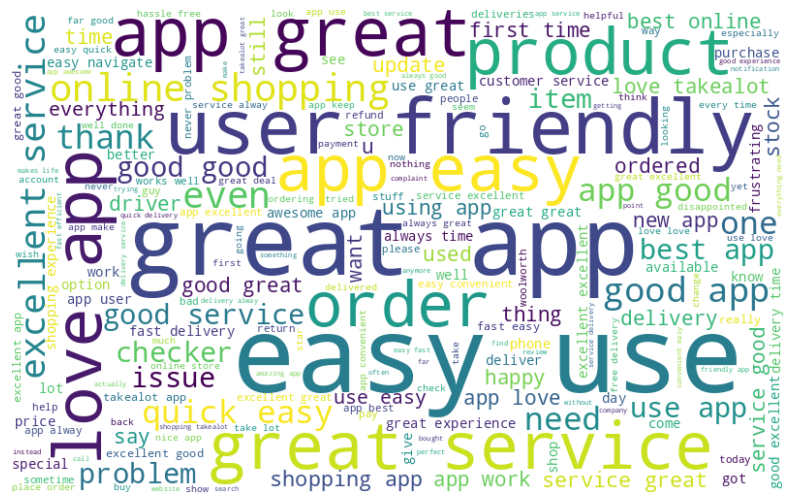

In [ ]:

# Create a word cloud from the cleaned reviews
all_words = ' '.join([text for text in apps_df['cleaned_review']])
wordcloud = WordCloud(width=800, height=500, random_state=21, background_color='white', max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [ ]:
# save wordcloud image

wordcloud.to_file("wordcloud_image.png")

**Word Cloud Output:**

Based on the results displayed by the word cloud, common words mentioned by the 3 retail apps' users include:
1. great
2. love
3. takealot
4. service
5. user firendly
6. good
7. app
8. product
9. shopping
10. easy
11. excellent

Let's determine the freqently mentioned words using a frequency distribution chart.

In [ ]:
# Analyzing the frequency distribution of keywords

# Step 1: Tokenize the words
words = ' '.join(apps_df['cleaned_review']).split()
word_freq = Counter(words)

# Step 2: Convert to DataFrame for visualization
word_freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)

# Step 3: Plot the top 20 keywords
fig = px.bar(word_freq_df.head(20), x='word', y='frequency', title='Top 20 Keywords mentioned by Retail Apps Users')
fig.show()


In [ ]:
word_freq_df.head(20)

word  frequency
0            app      36026
926        great      21929
339         easy      19439
78          good      17085
672         love      12779
139      service      11896
206          use      10376
442     delivery       9460
77        always       9267
1291   excellent       8836
1115        best       8084
122     shopping       7963
351        order       7824
88          time       7333
13178   takealot       6877
41          app.       6752
156          get       5797
1047      online       5671
1274        fast       4869
10         items       4735

In [ ]:

# Save the DataFrame to a CSV file
word_freq_df.to_csv('word_freq_df.csv', index=False)

#### Word cloud Insights

The outcome of using Word cloud/NLTK  yielded the folowing results:

* "app" keyword was the most mentioned word, accounting for  **35,719 times** it's mentioned by all three retail app users
* "great" keyword was second-most mentioned word, **21,880 times**
* "easy" keyword was the third-most mentioned word,**19,393 times**
* "items" was the least mentioned word, being mentioned **4,616 times**

In general, keywords signaling app quality and user experience of the 3 retail apps were frequently mentioned.

### Topic Modeling using LDA Algorithim

Topic modeling entails extracting major themes in textual data - reviews from our retail apps' users.

We will use Latent Dirichlet Allocation (LDA) algorithim.

Key steps:
* Load libraries
* Vectorize text data
* Apply LDA model to vectorized text data
* Illustrate top words for each topic

In [ ]:
#load libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
# Vectorize the text data
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(apps_df['Content'])


In [ ]:
#Instantiate and  Apply LDA model

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
# Illustrate top words for each topic
for index, topic in enumerate(lda.components_):
    print(f"Top 10 words for topic #{index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")

Top 10 words for topic #0
['quality', 'reliable', 'far', 'nice', 'amazing', 'best', 'app', 'excellent', 'service', 'good']


Top 10 words for topic #1
['love', 'experience', 'best', 'user', 'friendly', 'great', 'online', 'takealot', 'shopping', 'app']


Top 10 words for topic #2
['delivery', 'quick', 'awesome', 'convenient', 'fast', 'great', 'love', 'app', 'use', 'easy']


Top 10 words for topic #3
['service', 'ordered', 'don', 'delivered', 'stock', 'checkers', 'items', 'delivery', 'time', 'order']


Top 10 words for topic #4
['work', 'slow', 'does', 'items', 'use', 'just', 'new', 'update', 'great', 'app']




In [ ]:
# Visualize top words for each topic

def plot_top_words_for_topics(lda_model, vectorizer, n_top_words=10):
    """
    Plots the top words for each topic generated by the LDA model using Plotly.

    Parameters:
    lda_model (sklearn.decomposition.LatentDirichletAllocation): The trained LDA model.
    vectorizer (sklearn.feature_extraction.text.CountVectorizer or TfidfVectorizer): The vectorizer used to transform the text data.
    n_top_words (int): The number of top words to display for each topic. Default is 10.

    Returns:
    None: This function displays the plots directly.

    Example:
    plot_top_words_for_topics(lda_model, vectorizer, n_top_words=10)
    """
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words_indices = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_indices]
        top_words_scores = [topic[i] for i in top_words_indices]

        fig = go.Figure(data=[go.Bar(x=top_words, y=top_words_scores)])
        fig.update_layout(
            title=f"Top Words for Topic #{topic_idx}",
            xaxis_title="Words",
            yaxis_title="Scores",
            xaxis_tickangle=-45
        )
        fig.show()


plot_top_words_for_topics(lda, vectorizer)


#### Topic Modeling Insights

**Topic sampling method**: Segmentation of topics is based on relevancy and freshness of keywords - non-recurring group of keywords per topic.

**Topic 0**

* Top words include: ['excellent', 'time', 'service', 'fast', 'online']

* In terms of score (weights assined to words by lda model based on their significance in defining this topic) relating to the top 3 sub-themes:

  a) ***excellent*** : score of 9,652

  b) ***service*** : score of 8,454

  c) ***convenient***: score of 5,807

The three sub-themes represent what app users care about the most when interacting with the retail apps based on reviews.

**Interpretation**:

* **Themes**: This topic focuses on the user experience of delivery services and timeliness based on the presence of words like "delivery," "service," and "time".


**Insights**:

Users who commented using keywords grouped in this topic are likely to continue using the app or churn based on efficient service delivery and quality of service.


**Topic 1**

* Top words include: ['payment', 'just', 'keeps', 'card', 'new', 'exceptional']

* In terms of score for relating to the top 3 sub-themes:

  a) ***app*** : score of 9,905

  b) ***efficient*** : score of 2,870

  c) ***works***: score of 2,467

The three sub-themes represent what  users care about the most when interacting with the 3 retail apps based on reviews.

**Interpretation**:

* **Themes**: This topic focuses on the user experience of the Takealot app and ther other retail apps (checkers sixty and woolworths) based on keywords such as:  "friendly," "user," and "app".
* Words like "products" and "prices" indicate that users are discussing the availability, quality, or cost of items on the platform.


 **Insights**:

Users who commented using keywords grouped in this topic are likely expressing their positive or negative views on user experience, app functionality, products quality, and prices of products.


## User Segment Analysis

User segment analysis focuses on understanding different patterns and trends users of a mobile app depict within the reviews they share.

It involves categorizing users into distinct groups (segments) based on specific characteristics, behaviors, or preferences.

This can help a business understand how different types of users interact with its product, service, or mobile app, and tailor marketing strategies and product development to satisfy their core needs.

**Implementation steps:**

* Segment users based on sentiment and rating (review score)
* Segment users based on dominant topic insights


### Segmenting Users based on Sentiment and Review Score

Classification of the 3 retail apps' users will be based on type of sentiment. Users who shared reviews will be categorized as:

* Positive sentiment and score is greater than 4: **Happy** Users
* Negative sentiment and score is below 2: **Sad** Users

In [ ]:
#Function for segmenting users based on sentiment label and review score
def classify_user(row):
    """
    Classify users based on sentiment and score.

    Args:
        row (pd.Series): A DataFrame row containing 'score' and 'distilbert_sentiment_label'.

    Returns:
        str: User segment ('Happy User', 'Sad User', 'Neutral User').
    """
    if row['Score'] >= 4 and row['distilbert_sentiment_label'] == 'POSITIVE':
        return 'Happy User'
    elif row['Score'] <= 3 and row['distilbert_sentiment_label'] == 'NEGATIVE':
        return 'Sad User'
    else:
        return 'Neutral User'


# Apply the  segmentation function to the dataset
apps_df['user_type'] = apps_df.apply(classify_user, axis=1)

# Show the user segmentation
print(apps_df[['Content', 'App Name', 'distilbert_sentiment_label', 'user_type']].head())


                                             Content    App Name  \
0  This app is terrible, one of the worst. Every ...  Woolworths   
1  The app loads absolutely slow and navigating b...  Woolworths   
2  I have to give credit because the continuous i...  Woolworths   
3  Guys this app is convoluted and frustrating. J...  Woolworths   
4  Oops. Something went wrong... It seems that ch...  Woolworths   

  distilbert_sentiment_label user_type  
0                   NEGATIVE  Sad User  
1                   NEGATIVE  Sad User  
2                   NEGATIVE  Sad User  
3                   NEGATIVE  Sad User  
4                   NEGATIVE  Sad User  


In [ ]:
# Sentiment distribution by user type

# Group by user type and count the number of reviews for each sentiment label
sentiment_distribution_by_user_type = apps_df.groupby(['user_type', 'distilbert_sentiment_label','App Name'])['Content'].count().unstack()

# Display the results
print(sentiment_distribution_by_user_type)



App Name                                 Shoprite Sixty60  Takealot  \
user_type    distilbert_sentiment_label                               
Happy User   POSITIVE                                7131     98660   
Neutral User NEGATIVE                                1445      7757   
             POSITIVE                                 555      2719   
Sad User     NEGATIVE                               11830      4099   

App Name                                 Woolworths  
user_type    distilbert_sentiment_label              
Happy User   POSITIVE                          5900  
Neutral User NEGATIVE                           748  
             POSITIVE                           464  
Sad User     NEGATIVE                          5458  


In [ ]:
# proportion of sentiment distribution by user type
sentiment_distribution_by_user_type_prop = sentiment_distribution_by_user_type.div(sentiment_distribution_by_user_type.sum(axis=1), axis=0)

print(sentiment_distribution_by_user_type_prop)

App Name                                 Shoprite Sixty60  Takealot  \
user_type    distilbert_sentiment_label                               
Happy User   POSITIVE                            0.063846  0.883330   
Neutral User NEGATIVE                            0.145226  0.779598   
             POSITIVE                            0.148475  0.727394   
Sad User     NEGATIVE                            0.553140  0.191658   

App Name                                 Woolworths  
user_type    distilbert_sentiment_label              
Happy User   POSITIVE                      0.052824  
Neutral User NEGATIVE                      0.075176  
             POSITIVE                      0.124131  
Sad User     NEGATIVE                      0.255202  


In [ ]:
apps_df['user_type'].value_counts().sort_index()

user_type
Happy User      111691
Neutral User     13688
Sad User         21387
Name: count, dtype: int64

In [ ]:

# Visualize sentiment distribution by user types
sentiment_distribution_users = apps_df.groupby(['user_type', 'distilbert_sentiment_label'])['Content'].count().unstack()

# Display the results
#print(score_distribution_by_users)

# Visualize the distribution using Plotly
fig = px.bar(sentiment_distribution_users, barmode='group', title='Segmenting User Types by Sentiment')
fig.show()

#### Sentiment Distribution by User Type Insights


**Output of Segmenting User Types by Sentiment**:

1. There are about **111,709** Happy Users
2. There are about **21,267** Sad Users
3. There are about  **13,665** Neutral Users - Neither happy or sad, expressing both positive and negative sentiment.

In [ ]:
# Score distribution per user type

# Group by user type and calculate the distribution of scores
score_distribution_by_user_type = apps_df.groupby(['user_type', 'Score'])['Content'].count().unstack()

# Display the results
print(score_distribution_by_user_type)

# Visualize the distribution using Plotly
fig = px.bar(score_distribution_by_user_type, barmode='group', title='Segmenting User Types by Review Score')
fig.show()


Score               1       2       3        4        5
user_type                                              
Happy User        NaN     NaN     NaN  14939.0  96752.0
Neutral User   1083.0   394.0  2261.0   3020.0   6930.0
Sad User      14901.0  3448.0  3038.0      NaN      NaN


In [ ]:
# Segmenting user types by Score per App Name
score_distribution_by_user_type_app = apps_df.groupby(['App Name', 'user_type', 'Score'])['Content'].count().unstack()

# Display the results
print(score_distribution_by_user_type_app.T)

App Name  Shoprite Sixty60                         Takealot               \
user_type       Happy User Neutral User Sad User Happy User Neutral User   
Score                                                                      
1                      NaN        235.0   8449.0        NaN        658.0   
2                      NaN         84.0   1872.0        NaN        250.0   
3                      NaN        236.0   1509.0        NaN       1811.0   
4                    782.0        761.0      NaN    13288.0       1974.0   
5                   6349.0        684.0      NaN    85372.0       5783.0   

App Name           Woolworths                        
user_type Sad User Happy User Neutral User Sad User  
Score                                                
1           2433.0        NaN        190.0   4019.0  
2            670.0        NaN         60.0    906.0  
3            996.0        NaN        214.0    533.0  
4              NaN      869.0        285.0      NaN  
5            

In [ ]:
# cleaner version of segmenting user types by review score per App Name
apps_df[['user_type','App Name', 'Score']].value_counts().sort_index()

user_type     App Name          Score
Happy User    Shoprite Sixty60  4          782
                                5         6349
              Takealot          4        13288
                                5        85372
              Woolworths        4          869
                                5         5031
Neutral User  Shoprite Sixty60  1          235
                                2           84
                                3          236
                                4          761
                                5          684
              Takealot          1          658
                                2          250
                                3         1811
                                4         1974
                                5         5783
              Woolworths        1          190
                                2           60
                                3          214
                                4          285
                                5          463
Sad User      Shoprite Sixty60  1         8449
                                2         1872
                                3         1509
              Takealot          1         2433
                                2          670
                                3          996
              Woolworths        1         4019
                                2          906
                                3          533
Name: count, dtype: int64

#### Segmenting User Types by Review Scores Insights


**Output of Segmenting User Types by Review Score**:

Happy Users segmentation:

1. 4-Star Happy Users: 14,902 users
2. 5-Star Happy Users: 96,807 users

Sad Users segmentation:

1. 1-Star Sad Users: 14,904 users
2. 2-star Sad  Users: 3,426 users
3. 3-star Sad Users: 3,037 users

Further breakwdown of Users segmentation per Retail App is shown below:


a) **Shoprite Happy Users**:
* 4-Star Happy Users: 772 users
* 5-Star Happy Users: 6,371 users

**Shoprite Sad Users**:

* 1-Star Sad Users: 8,477 users
* 2-star Sad Users: 1,850 users
* 3-star Sad Users: 1,503 users


b) **Takealot Happy Users**:
* 4-Star Happy Users: 13,263 Users
* 5-Star Happy Users: 85,407 Users

**Takealot Sad Users**:

* 1-Star Sad Users: 2,416 users
* 2-star Sad Users:  671 users
* 3-star Sad Users: 1,001 users

C) **Woolworths Happy Users**:
* 4-Star Happy Users: 867 Users
* 5-Star Happy Users: 5,029 Users

**Woolworths Sad Users**:

* 1-Star Sad Users: 4,011 users
* 2-star Sad Users:  905 users
* 3-star Sad Users:  533 users

### Segmenting Users based on Topic Modeling Insights - Dominant Topics

Classification of retail app users based on defined categories of dominant keywords that influence the behaviour and opinions of users.

Approach:
* Assign dominant topics to each review
* Group users based on their reviews' dominant topics



In [ ]:
# Based on top 10 words per topic, create a column that assigns each review to a dominant topic
# The top 10 words are based on output of LDA model

# Define dictionary of top words for each topic based on LDA model
topic_top_words = {
    0: ['thank', 'app', 'takealot', 'reliable', 'fast', 'shopping', 'online', 'convenient', 'service', 'excellent'],
    1: ['time', 'payment', 'just', 'keeps', 'card', 'new', 'exceptional', 'works', 'efficient', 'app'],
    2: ['shopping', 'amazing', 'takealot', 'service', 'quick', 'use', 'love', 'app', 'easy', 'great'],
    3: ['delivered', 'products', 'takealot', 'service', 'items', 'app', 'time', 'delivery', 'best', 'order'],
    4: ['experience', 'search', 'slow', 'update', 'far', 'user', 'awesome', 'friendly', 'app', 'good']
}

# Mapping of topic indices to descriptive topic names
topic_name_mapping = {
    0: "Convenient Shopping & Quality Service",
    1: "Technical Issues & Payment Efficiency",
    2: "Shopping Experience",
    3: "Delivery & Order Fulfillment",
    4: "App Performance & User Experience"
}

def assign_dominant_topic(review):
    """
    Assigns the dominant topic to a review based on keyword matching.

    This function calculates the topic for a given review by identifying
    the topic with the most shared keywords. Each topic has an associated
    list of top words, and the review is assigned the topic with the highest
    overlap of words.

    Parameters:
    review (str): The review text to assign a dominant topic.

    Returns:
    str: The name of the dominant topic assigned to the review.
    """
    # Convert review to lowercase and split into unique words
    review_words = set(review.lower().split())


    # Determine the topic with the maximum score
    dominant_topic_index = max({topic_index: len(review_words.intersection(top_words))
                    for topic_index, top_words in topic_top_words.items()}, key={topic_index: len(review_words.intersection(top_words))
                    for topic_index, top_words in topic_top_words.items()}.get)

    # Return the name of the dominant topic
    return topic_name_mapping.get(dominant_topic_index, "Unknown Topic")






In [ ]:
# Apply the function to each review to create a new 'dominant_topic' column
apps_df["dominant_topic"] = apps_df["Content"].apply(assign_dominant_topic)

In [ ]:
# Print some samples to verify
print(apps_df[['App Name',"Content", "dominant_topic"]].sample(10))

                App Name                                            Content  \
44560           Takealot                    Most convenient way of shopping   
2549          Woolworths  I am unable to login or register a new email a...   
104349          Takealot                                              Great   
70423           Takealot                                  Great app to have   
73759           Takealot                                      Love this app   
116729          Takealot                                          very good   
135009  Shoprite Sixty60  Trying to order on App but I keep getting a me...   
28721           Takealot  Early delivery , convenient and secure. Door t...   
126142  Shoprite Sixty60  I love Sixty60 and the whole concept of not ha...   
7635          Woolworths                       Woolworth has a good product   

                               dominant_topic  
44560   Convenient Shopping & Quality Service  
2549    Technical Issues & Payment

In [ ]:
# Group users per dominant topic by counting occurences of each dominat topic

user_topic_counts = apps_df.groupby(['Content', 'dominant_topic']).size().unstack(fill_value=0)

# Determine the most common topic for each user
user_primary_topic = user_topic_counts.idxmax(axis=1)

# user segments dataframe
user_segments = user_primary_topic.reset_index(name='dominant_topic')

# Print the user segments
print(user_segments.head(10))

                                             Content  \
0                                            !!!!! /   
1                                !Best app ever!!!!!   
2                         !Shop to door! In a jiffy.   
3                                            !making   
4                           " The best way to shop "   
5  "....Incredible range of products and items, b...   
6  "60"sixty. Deliver in sixty minutes... Plus a ...   
7  "Area not currently serviced"- Only AFTER down...   
8  "Buggy" app that increases item prices when yo...   
9                                   "Find in store "   

                          dominant_topic  
0  Convenient Shopping & Quality Service  
1  Convenient Shopping & Quality Service  
2  Convenient Shopping & Quality Service  
3  Convenient Shopping & Quality Service  
4           Delivery & Order Fulfillment  
5           Delivery & Order Fulfillment  
6                    Shopping Experience  
7  Convenient Shopping & Quality Servic

In [ ]:
# numerical proportion of dominant topic counts per App Name
apps_df[['App Name','dominant_topic']].value_counts().sort_index()

App Name          dominant_topic                       
Shoprite Sixty60  App Performance & User Experience         1645
                  Convenient Shopping & Quality Service     7477
                  Delivery & Order Fulfillment              4875
                  Shopping Experience                       2825
                  Technical Issues & Payment Efficiency     4139
Takealot          App Performance & User Experience        15262
                  Convenient Shopping & Quality Service    44940
                  Delivery & Order Fulfillment              8684
                  Shopping Experience                      37777
                  Technical Issues & Payment Efficiency     6572
Woolworths        App Performance & User Experience         1921
                  Convenient Shopping & Quality Service     5567
                  Delivery & Order Fulfillment              1132
                  Shopping Experience                       2013
                  Technical Issues & Payment Efficiency     1937
Name: count, dtype: int64

In [ ]:
# Visualize user segments based on dominant topics

# Numerical counts of user segments
user_segment_counts = apps_df['dominant_topic'].value_counts().sort_values(ascending=False)

fig = px.bar(
    user_segment_counts,
    x=user_segment_counts.index,
    y=user_segment_counts.values,
    labels={'x': 'User Segment', 'y': 'Number of Users'},
    title='Distribution of Showmax User Segments Based on Dominant Topics'
)
fig.update_layout(xaxis_title='User Segment', yaxis_title='Number of Users')
fig.write_image("user_segment_counts_per_dominant_topics.png")
fig.show()

#### User Segmentation by Dominant Topics Insights

Key insights derived from segmenting All retail apps' users based on dominant topics include:

1. Retail apps' users segmented by  **Convenient Shopping Experience & Quality Service** topic: 57,949 users
2. Retail apps' users  segmented by **Shopping Experience** topic: 42,528 users
3. Retail apps' users  segmented by **App Peformance & User Experience** topic: 18,898 users
4. Retail apps' users  segmented by **Delivery & User Order Fulfillment** topic: 14,675 users
5. Retail apps' users  segmented by **Technical Issues & Payment Efficiency** topic: 12,691 users

**Best practice**: Save final version of the dataset as csv file

In [ ]:
# save final version of apps_df as csv file named: "All_retail_final_data_2024"

apps_df.to_csv('All_retail_final_data_2024.csv', index=False)

## Summarized Insights



The overarching insights obtained from the NLP project entails:


1. Distribution of review scores:

  - Majority of the review scores were 5-score rating, containing **103,718 reviews with 5-star score**.
  -  Takelot app leads with the highest number of reviews that received 5-star score, **about 91,177 reviews**.
  - Woolworths lags behind in all the review score range ( 1- 5) in terms of volume of reviews submitted by users


2. Segmenting number of rebiews per Retail App Version:

- **Takealot:**

  The number of reviews is highest for earlier app
  versions, with a peak **around version 3.5.0**. Thereafter, the number of reviews gradually decreases as the app versions increase. This might indicate that the earlier versions had more user engagement or issues that prompted reviews.


- **Shoprite Sixty60:**

  The number of reviews peaks around **version 1.4.3** and then decreases sharply for subsequent versions. This suggests that version 1.4.3 had the highest user engagement, which may be due to a significant update or issues that attracted user attention.


- **Woolworths:**

  The number of reviews is highest around version 6.0.0 and then decreases for later versions. This could imply that version 6.0.0 was particularly significant in terms of user interaction or had notable changes that users responded to.


3. Review Score per Retail App Version:

a. **Takealot:**

  - App versions 3.35.0, 1.13.0, 2.61, and 2.62  received the highest average review scores of 5.0
  - Review scores are consistently high, predominantly between 4 and 5, across app versions
  - The smooth upward trend suggests that newer app versions maintain or improve user satisfaction

b. **Shoprite Sixty60:**

  - App version 1.4.13 received the highest average review score of 4.45
  - Review scores are significantly lower, clustered around 1 to 3, indicating a less positive user experience
  - The upward trend in newer app versions may show some improvement, but overall, sentiment remains low compared to Takealot

c. **Woolworths:**

  - App version 9.4.0 received the highest average review score of 5
  - Review scores are concetrated around the middle, ranging mostly between 2.5 and 4
  - While not as positive as Takealot, the upward trend across app versions shows steady improvements in user satisfaction


4. In general, all retail apps got **exceptional average sentiment scores above 0.98**:

  * Woolworths had the highest average sentiment score: 0.988. This correlates to a **Strongly positive sentiment**, with customers pereciving excellent satisfaction and favorable app experiences.

  * It's followed by Shoprite Sixty60, whose average sentiment score trails closely: 0.987. This translates to a **Strong positive sentiment**.The app also enjoys strong positive feedback

  * Takealot ranks third but still has a very high sentiment score with average distilbert sentiment score of 0.986.

5. In terms of **segmenting number of reviews per sentiment score**:

  * **Takealot**: Similar to Woolworths, the sentiment scores are also highly concentrated at 1, with approximately 87,000 reviews. This suggests that the Takealot app has received overwhelmingly positive feedback from users.

  * **Shoprite Sixty60**: The sentiment scores are again concentrated at 1, with around 19,474 reviews. This shows that the Shoprite Sixty60 app is also highly favored by its users.

   * **Woolworths**: The sentiment scores are highly concentrated at the maximum value of 1, with around 11,768 reviews. This indicates that users generally have a very positive sentiment towards the Woolworths app.


6. In terms of **frequently mentioned keywords** by users of the three retail apps:

  * "app" keyword was the most mentioned word, accounting for  **35,719 times** it's mentioned by all three retail app users
  * "great" keyword was second-most mentioned word, **21,880 times**
  * "easy" keyword was the third-most mentioned word,**19,393 times**
  * "items" was the least mentioned word, being mentioned **4,616 times**

  In general, keywords signaling app quality and user experience of the 3 retail apps were frequently mentioned.


7. In terms of topic modeling and frequency of words analysis:
**Topic 0**

* Top words include: ['excellent', 'time', 'service', 'fast', 'online']

* In terms of score (weights assined to words by lda model based on their significance in defining this topic) relating to the top 3 sub-themes:

  a) ***excellent*** : score of 9,652

  b) ***service*** : score of 8,454

  c) ***convenient***: score of 5,807

The three sub-themes represent what app users care about the most when interacting with the retail apps based on reviews.

**Interpretation**:

* **Themes**: This topic focuses on the user experience of delivery services and timeliness based on the presence of words like "delivery," "service," and "time".


**Insights**:

Users who commented using keywords grouped in this topic are likely to continue using the app or churn based on efficient service delivery and quality of service.


**Topic 1**

* Top words include: ['payment', 'just', 'keeps', 'card', 'new', 'exceptional']

* In terms of score for relating to the top 3 sub-themes:

  a) ***app*** : score of 9,905

  b) ***efficient*** : score of 2,870

  c) ***works***: score of 2,467

The three sub-themes represent what  users care about the most when interacting with the 3 retail apps based on reviews.

**Interpretation**:

* **Themes**: This topic focuses on the user experience of the Takealot app and ther other retail apps (checkers sixty and woolworths) based on keywords such as:  "friendly," "user," and "app".
* Words like "products" and "prices" indicate that users are discussing the availability, quality, or cost of items on the platform.


 **Insights**:

Users who commented using keywords grouped in this topic are likely expressing their positive or negative views on user experience, app functionality, products quality, and prices of products.
  

8. In terms of **segmenting User Types by Sentiment**:

  - There are about **111,709** Happy Users
  - There are about **21,267** Sad Users
  - There are about  **13,665** Neutral Users - Neither happy or sad, expressing both positive and negative sentiment.


9. In terms of **segmenting User Types by Review Scores**:

Happy Users segmentation:

  - 4-Star Happy Users: 14,902 users
  - 5-Star Happy Users: 96,807 users

Sad Users segmentation:

  - 1-Star Sad Users: 14,904 users
  - 2-star Sad  Users: 3,426 users
  - 3-star Sad Users: 3,037 users


Further breakwdown of Users segmentation per Retail App is shown below:


a) **Shoprite Happy Users**:
  * 4-Star Happy Users: 772 users
  * 5-Star Happy Users: 6,371 users

**Shoprite Sad Users**:

  * 1-Star Sad Users: 8,477 users
  * 2-star Sad Users: 1,850 users
  * 3-star Sad Users: 1,503 users


b) **Takealot Happy Users**:
  * 4-Star Happy Users: 13,263 Users
  * 5-Star Happy Users: 85,407 Users

**Takealot Sad Users**:

  * 1-Star Sad Users: 2,416 users
  * 2-star Sad Users:  671 users
  * 3-star Sad Users: 1,001 users

C) **Woolworths Happy Users**:

  * 4-Star Happy Users: 867 Users
  * 5-Star Happy Users: 5,029 Users

**Woolworths Sad Users**:

  * 1-Star Sad Users: 4,011 users
  * 2-star Sad Users:  905 users
  * 3-star Sad Users:  533 users

10. In terms of **segmenting Retail App Users by Dominant Features/topic**:

  - Retail apps' users segmented by  **Convenient Shopping Experience & Quality Service** topic: 57,949 users
  - Retail apps' users  segmented by **Shopping Experience** topic: 42,528 users
  - Retail apps' users  segmented by **App Peformance & User Experience** topic: 18,898 users
  - Retail apps' users  segmented by **Delivery & User Order Fulfillment** topic: 14,675 users
  - Retail apps' users  segmented by **Technical Issues & Payment Efficiency** topic: 12,691 users

## Recommendations

The key recommendations the 3 retail apps can adopt based on the data-influenced insights include:

<u>**Takealot Recommendations**</u>

**Key Insights:**

- Highest number of 5-star reviews (91,177).
- User sentiment remains overwhelmingly positive (average sentiment score: 0.986).
- Earlier app versions (e.g., 3.5.0) had the highest review engagement.
- Strong user engagement around topics such as service quality and convenience.

**Recommendations:**

1. **Leverage High Engagement from Earlier Versions**

* Conduct in-depth analysis of version 3.5.0 to identify key features or UI/UX elements that resonated with users.
* Reintroduce or enhance those features in current and upcoming versions.
* Promote feature updates with marketing campaigns highlighting improvements from previous popular versions.

2. **Collect User Feedback on Evey New App Version/Update**

* Implement in-app prompts encouraging reviews post-purchase or after key interactions.
* Offer incentives (discounts, loyalty points) to boost feedback from satisfied users.

3. **Develop Personalized Marketing Inititives Targeting Sad and Neutral Users for Retention**

* Analyze 1-3 star reviews to pinpoint recurring issues such as payment failures or product availability.
* Develop personalized offers and targeted communication to improve satisfaction levels for unhappy users.

4. **Continously Invest in Positive Service Delivery and User Experience**

* Continue investing in fast delivery and customer service excellence to sustain strong sentiment around "service" and "convenience."
* Introduce AI-powered chatbots to handle common queries and improve response times.


<u>**Shoprite Sixty60 App Recommendations**</u>

**Key Insights**:
- Version 1.4.3 saw peak engagement, but ratings are relatively lower compared to competitors.
- Sentiment score is positive (0.987), but review ratings are clustered around 1-3 stars.
- Many sad users (1-star: 8,477 users), suggesting unresolved issues in app performance or fulfillment.

**Recommendations**:

1. **Address App Performance and Usability Concerns**

- Conduct extensive app performance testing to resolve technical issues such as slow load times and checkout failures.
- Improve user interface with simplified navigation and faster checkout options to improve user experience.

2. **Promote Features that Drive Positive Sentiment**

- Highlight app features related to convenience and service improvements in marketing campaigns.
- Encourage happy users (4-star and 5-stars) to share positive experiences on social media and tag Shoprite Sixty60 app, which may offset negative reviews.

3. **Rebuild Customer Trust Through Customer Support Improvements**

- Increase responsiveness to 1-3 star reviews by offering clear solutions and compensations where applicable.
- Implement a robust order tracking system to mitigate complaints related to delivery times and order fulfillment.


<u>**Woolworths App Recommendations**</u>

**Key Insights:**

- Lowest review volume across all score ranges.
- Version 6.0.0 saw the highest engagement, and version 9.4.0 had the highest average rating (5.0).
- Users highly value service quality and shopping convenience.
- Highest sentiment score (0.988), but reviews are mostly concentrated between 2.5 - 4 stars, indicating room for improvement.

**Recommendations**

1. **Capitalize on Version 9.4.0's Success**

- Identify and highlight the factors that led to the highest user ratings in this version.
- Build targeted marketing campaigns emphasizing key improvements based on user feedback.

2. **Enhance Product Listings and Search Functionality**

- Since "items" were one of the least mentioned keywords, Woolworths should focus on improving product discoverability with better search filters and category recommendations.
- Ensure product availability is optimized to avoid negative sentiment related to stock issues.



<u>**Cross-App Recommendations (Applicable to All 3 Retail Apps)**</u>

1.  **Leverage Happy Users for Brand Advocacy**

* Create a referral program or incentives for users to leave reviews and share their Showmax experience on social media, amplifying positive sentiments. Rewards can be discounts on monthly subscriptions or free subscription periods.

2. **Optimize App Performance Across All Versions**

- Regular app health checks to identify and fix performance bottlenecks, especially for high-traffic versions.
- Introduce a beta testing program involving power users to provide early feedback before major updates.

3. **Leverage Popular Keywords in Marketing Campaigns**

- Words like “great,” “easy,” and “fast” should be emphasized in ad copy and app store descriptions to attract new users.
- Develop content around "service" and "convenient shopping experience" themes to signal strengths.

4. **Improve Technical Support for Payment-Related Issues**

- Introduce a dedicated support channel for payment and transaction-related queries.
- Partner with leading payment providers to offer seamless and secure checkout experiences.





